# Anatomy of Acclaim: Deconstructing Album Success (2000-2022)

### By: Raimundo Araújo
### Date: August 31, 2025

## 1. Introduction & Abstract

This project analyzes a dataset of the top 5,000 albums from Rate Your Music (2000-2022) to understand the characteristics of critically acclaimed music in the 21st century. The analysis reveals a canon built on a foundation of Rock music, but one that has been significantly reshaped by the rise of Hip Hop. Furthermore, the data shows a massive increase in user engagement over time, coinciding with a slight decline in average ratings in the modern streaming era.

## 2. Data Sourcing and Preparation

In [70]:
import pandas as pd

# Load your clean dataset
df = pd.read_csv('rym_clean1.csv')

## 3. Exploratory Data Analysis (EDA): Uncovering the Story

In [71]:
# Print the structural information (the "schematics")
print("--- Dataframe Info ---")
df.info()

# Print the statistical summary for numerical columns
print("\n--- Statistical Summary ---")
print(df.describe())

--- Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5000 non-null   int64  
 1   position          5000 non-null   int64  
 2   release_name      5000 non-null   object 
 3   artist_name       5000 non-null   object 
 4   release_date      5000 non-null   object 
 5   release_type      5000 non-null   object 
 6   primary_genres    4999 non-null   object 
 7   secondary_genres  4505 non-null   object 
 8   descriptors       5000 non-null   object 
 9   avg_rating        5000 non-null   float64
 10  rating_count      5000 non-null   int64  
 11  review_count      5000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 468.9+ KB

--- Statistical Summary ---
        Unnamed: 0     position   avg_rating  rating_count  review_count
count  5000.000000  5000.000000  5000.000000  

In [72]:
# Drop the 'Unnamed: 0' column from the DataFrame
df = df.drop(columns=['Unnamed: 0'])

# Verify the column is gone by checking the first few rows
print("DataFrame after dropping redundant column:")
df.head()

DataFrame after dropping redundant column:


,position,release_name,artist_name,release_date,release_type,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count
0,1,OK Computer,Radiohead,1997-06-16,album,"Alternative Rock, Art Rock",NaN,"melancholic, anxious, futuristic, malevocals, ...",4.24,74027,1541
1,2,Kid A,Radiohead,2000-10-03,album,"Art Rock, Experimental Rock, Electronic","Ambient, Electronic, IDM","cold, melancholic, futuristic, anxious, atmosp...",4.23,61658,751
2,3,The Dark Side of the Moon,Pink Floyd,1973-03-23,album,"Art Rock, Progressive Rock","Psychedelic Rock, Space Rock","philosophical, atmospheric, introspective, exi...",4.21,60192,1557
3,4,Loveless,My Bloody Valentine,1991-11-11,album,"Shoegaze, Noise Pop","Dream Pop, Neo-Psychedelia","noisy, ethereal, atmospheric, romantic, love, ...",4.24,53174,1264
4,5,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22,album,"Pop Rap, Hip Hop",Art Pop,"epic, boastful, passionate, sampling, hedonist...",4.09,52149,638


In [73]:
# Convert 'release_date' to datetime objects
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the year into a new column called 'release_year'
df['release_year'] = df['release_date'].dt.year

print("\nDataFrame with new 'release_year' column:")
df[['release_name', 'release_date', 'release_year']].head()


DataFrame with new 'release_year' column:


,release_name,release_date,release_year
0,OK Computer,1997-06-16,1997
1,Kid A,2000-10-03,2000
2,The Dark Side of the Moon,1973-03-23,1973
3,Loveless,1991-11-11,1991
4,My Beautiful Dark Twisted Fantasy,2010-11-22,2010


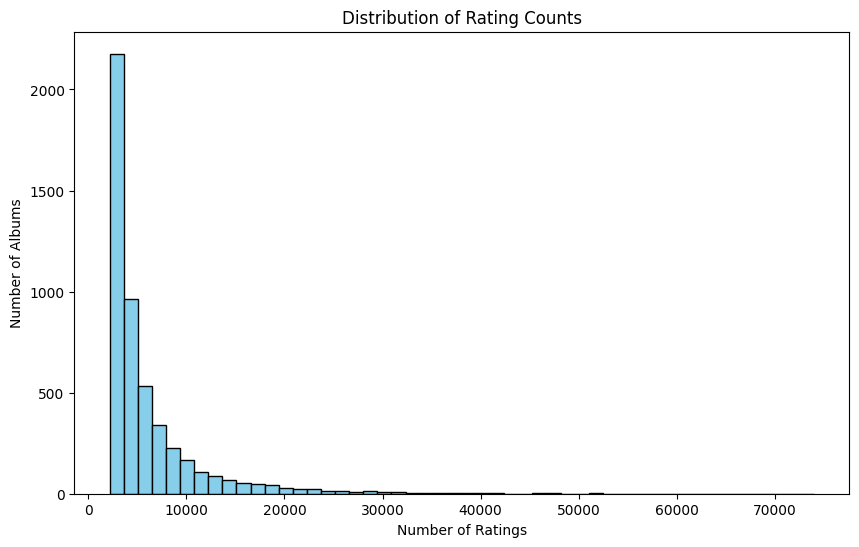

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['rating_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Rating Counts')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Albums')
plt.show()

### 3.1 Initial Data Overview & Outliers

A high-level statistical summary of the dataset immediately reveals a wide range in both ratings and popularity. While most top albums are clustered around a mean rating of 3.54, the outliers at the extreme ends of the spectrum tell a fascinating story about the dataset's character, its credibility, and the culture of the community that created it.

In [75]:
# Find the most popular album (the one with 74,027 ratings)
most_popular_album = df.loc[df['rating_count'].idxmax()]

# Find the lowest-rated album (the one with a 0.62 rating)
lowest_rated_album = df.loc[df['avg_rating'].idxmin()]

print("\n--- Outlier Investigation ---")
print("\nMost Popular Album:")
print(most_popular_album)
print("\nLowest-Rated Album in the Top 5000:")
print(lowest_rated_album)


--- Outlier Investigation ---

Most Popular Album:
position                                                            1
release_name                                              OK Computer
artist_name                                                 Radiohead
release_date                                      1997-06-16 00:00:00
release_type                                                    album
primary_genres                             Alternative Rock, Art Rock
secondary_genres                                                  NaN
descriptors         melancholic, anxious, futuristic, malevocals, ...
avg_rating                                                       4.24
rating_count                                                    74027
review_count                                                     1541
release_year                                                     1997
Name: 0, dtype: object

Lowest-Rated Album in the Top 5000:
position                                        

**Interpreting the Outliers:**

* **The Benchmark: Radiohead's *OK Computer* (Most Popular)**
    The album with the highest `rating_count` (over 74,000) is *OK Computer*. This finding serves as a crucial **sanity check** for the dataset. *OK Computer* is not a random album; it is a globally recognized landmark of 90s rock, consistently ranked by critics and fans as one of the greatest albums ever made. Its position at the very top of this community's engagement metrics validates the dataset's credibility. It tells us that the RYM community, while having its own specific tastes, is grounded in a recognizable and well-established critical consensus. The top of our data reflects a genuine musical reality.

* **The Anomaly: *Nostalgia Critic's The Wall* (Lowest-Rated)**
    The album with the lowest `avg_rating` (a startling 0.62) is a parody album by an internet personality. This is not just a "bad" album; it is a piece of internet culture. Its presence in a "top 5000" dataset is a direct result of online phenomena, likely **"vote brigading,"** where a community coordinates to express a strong, collective opinion—in this case, overwhelmingly negative.

    This outlier is critically important because it teaches us two things about our data:
    1.  It proves that a high `rating_count` (popularity) is **not always a measure of positive acclaim**. It can also measure notoriety, controversy, or an album's status as a meme.
    2.  It shows that this dataset is more than a sterile collection of ratings; it is a **living reflection of a dynamic online community**, complete with its own in-jokes, cultural moments, and reactions to the wider internet.

### 3.2 The Impact of the Internet: Popularity Over Time

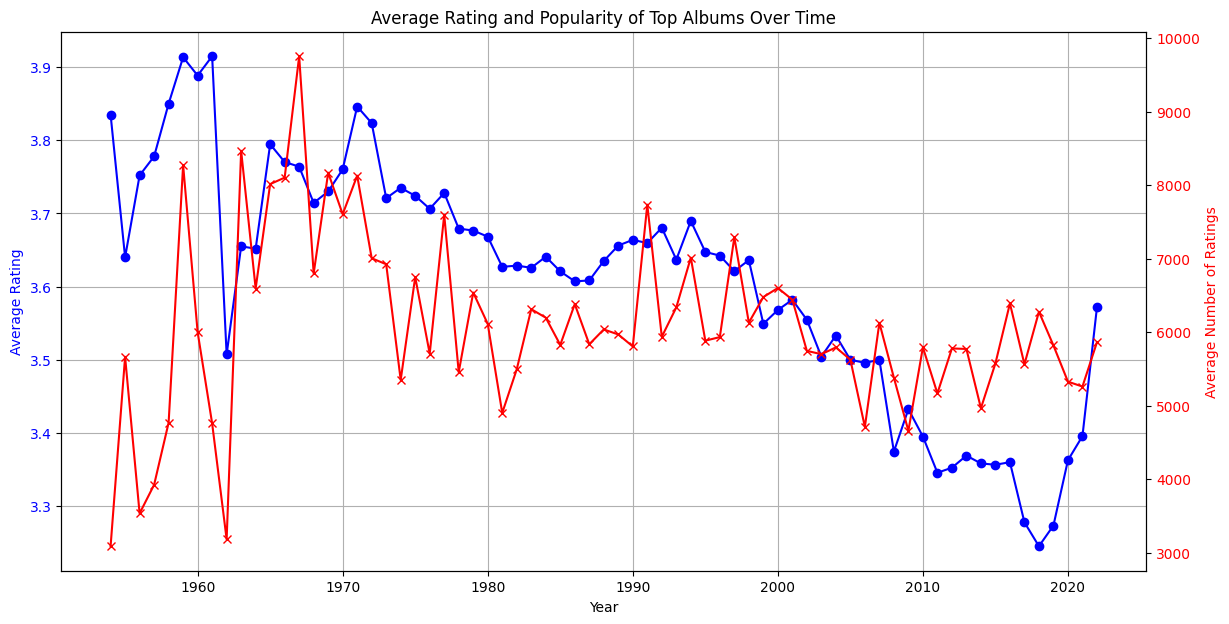

In [76]:
# Group the data by year and calculate the mean for rating and count
yearly_stats = df.groupby('release_year').agg({
    'avg_rating': 'mean',
    'rating_count': 'mean'
}).reset_index()

# Create the plots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot 1: Average Rating over time
ax1.plot(yearly_stats['release_year'], yearly_stats['avg_rating'], color='blue', marker='o', label='Average Rating')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Rating', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Average Rating and Popularity of Top Albums Over Time')
ax1.grid(True)

# Plot 2: Average Rating Count over time (on a second y-axis)
ax2 = ax1.twinx() # Create a second y-axis that shares the same x-axis
ax2.plot(yearly_stats['release_year'], yearly_stats['rating_count'], color='red', marker='x', label='Average Rating Count')
ax2.set_ylabel('Average Number of Ratings', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

This chart visualizes two key trends, but it tells one primary story: the story of the Rate Your Music platform itself and the explosion of online music communities. The trends we see are deeply influenced by the history of the internet.

* **The Popularity Explosion:** The most dramatic feature of this chart is the red line, representing the `Average Number of Ratings`. It remains relatively low and flat for decades and then begins an almost exponential climb around the year 2000. This is a direct reflection of the platform's growth. Albums released before the internet era are **"retrospectively rated"** by a community that grew over time, while albums from the 21st century were rated in real-time by an ever-expanding user base. This creates an inherent bias in the data: newer albums in the canon naturally have a higher average number of ratings than older classics.

* **Rating Volatility and Trends:** The blue line, representing the `Average Rating`, is much more stable but still reveals interesting patterns. The high volatility and sharp peaks in the early years (pre-1975) are a classic example of a **"small sample size" effect**. With fewer canonical albums from that era in the dataset, a single, exceptionally-rated album can pull up the average for an entire year. More subtly, the chart reveals a slight but noticeable dip in average ratings during the 2010s, a trend we will investigate more directly later in the analysis.

### 3.3 The RYM Canon: A Rock-Centric Landscape

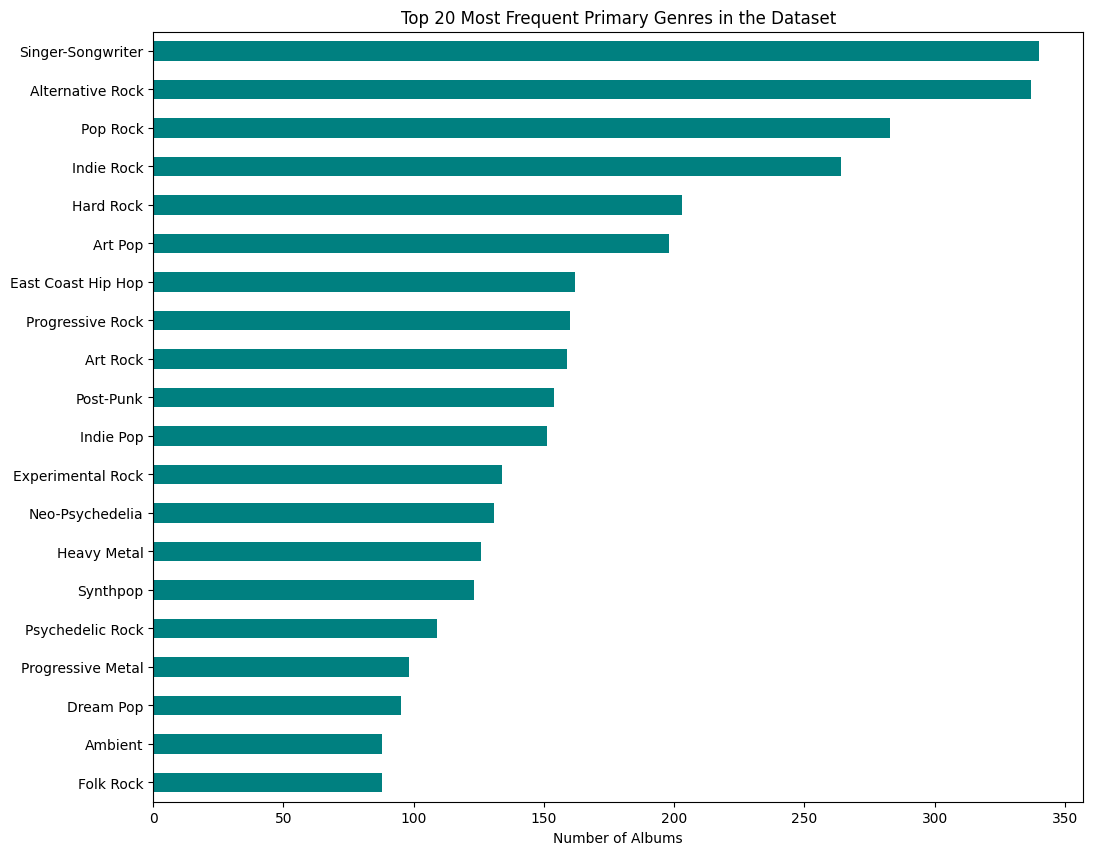

In [77]:
# The 'primary_genres' column has strings like "Art Rock, Experimental Rock". 
# We need to split them, and count each genre individually.

# First, drop the one row with a missing primary genre to avoid errors
df_genres = df.dropna(subset=['primary_genres'])

# Split the strings by comma, and create a new row for each genre ('explode')
genres = df_genres['primary_genres'].str.split(', ').explode()

# Get the counts of the top 20 most frequent genres
top_20_genres = genres.value_counts().head(20)

# Plot the results
plt.figure(figsize=(12, 10))
top_20_genres.sort_values().plot(kind='barh', color='teal') # Horizontal bar chart
plt.title('Top 20 Most Frequent Primary Genres in the Dataset')
plt.xlabel('Number of Albums')
plt.show()

This chart provides perhaps the most important piece of context for our entire project. It acts as a **fingerprint** of the Rate Your Music community's collective taste, revealing the genres that form the foundation of its critical canon.

* **The Dominance of Rock:** The most immediate and striking observation is the overwhelming prevalence of Rock music. The top-level "Rock" genre, combined with its many prominent subgenres like "Alternative Rock," "Art Rock," and "Progressive Rock," constitutes the vast majority of the most acclaimed albums in this dataset.

* **Other Pillars of the Canon:** While Rock is the clear hegemon, other genres form significant pillars. "Hip Hop," "Electronic," "Jazz," and "Folk" are all strongly represented, demonstrating a diverse but specific range of tastes.

* **Understanding Dataset Bias:** This chart is the clearest illustration of **dataset bias**. The data is not a neutral, objective sample of all music ever produced. Instead, it is a reflection of the preferences of the community that created it. This is not a flaw; it is a characteristic that we must acknowledge. Every conclusion drawn from this point forward must be understood through this lens. We are not analyzing what makes an album "great" in a universal sense, but rather what defines an acclaimed album *within the specific cultural context of the Rate Your Music community*. This chart defines the "RYM Canon" that is the subject of our study.

### 3.4 The Shifting Canon: Genre Evolution Since 1960

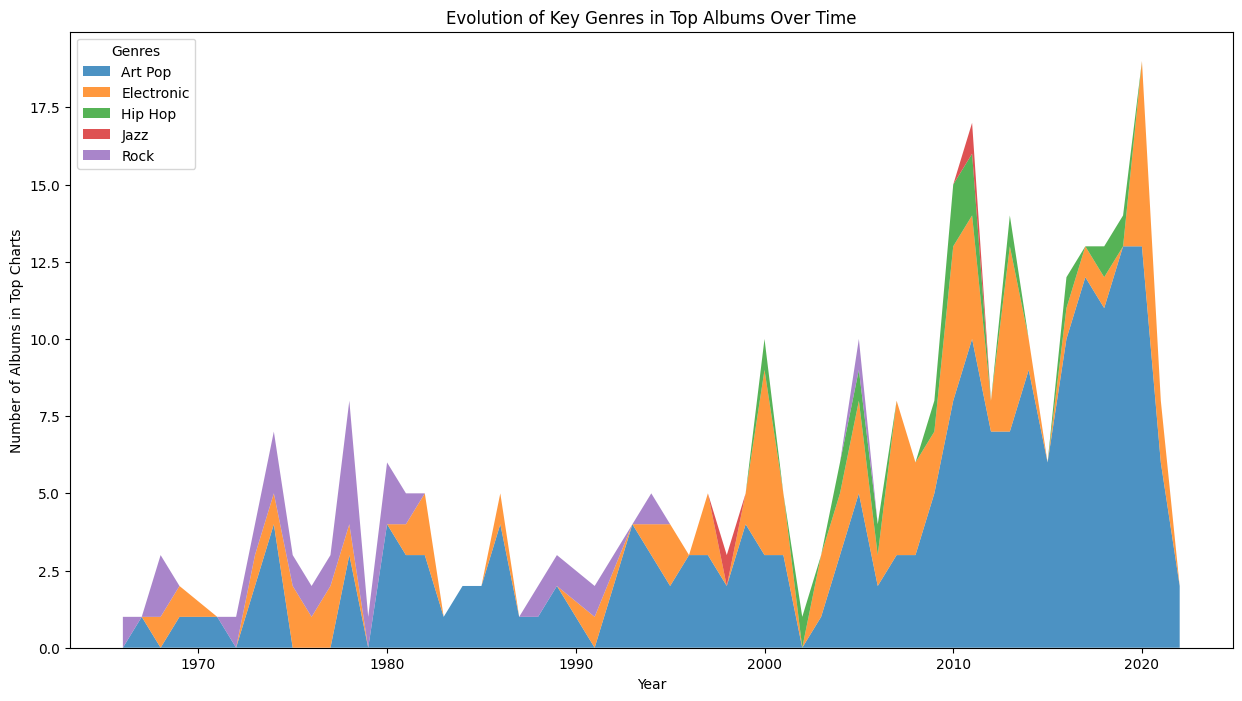

In [78]:
# We'll use the 'genres' Series we created in the last step
# First, let's merge it back with the release year
genres_with_year = df_genres[['release_year']].join(genres.rename('genre'))

# Let's track a few key genres
genres_to_track = ['Rock', 'Hip Hop', 'Electronic', 'Jazz', 'Folk', 'Art Pop']

# Filter our data to only include these genres
evolution_df = genres_with_year[genres_with_year['genre'].isin(genres_to_track)]

# Now, we pivot the data to count the occurrences of each genre per year
genre_evolution = evolution_df.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(15, 8))
plt.stackplot(genre_evolution.index, genre_evolution.T, labels=genre_evolution.columns, alpha=0.8)
plt.title('Evolution of Key Genres in Top Albums Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Albums in Top Charts')
plt.legend(title='Genres', loc='upper left')
plt.show()

If the previous chart was a static photograph of the RYM canon, this stack plot is a dynamic film. It reveals the tectonic shifts in critically acclaimed music over more than half a century, showing that while the canon has a clear foundation, it is anything but static.

* **The Classic Era (1960s - 1980s):** The story begins with the undisputed reign of Rock. The vast blue area shows how Rock music, along with foundational genres like Jazz and Folk, completely defined the critical landscape for decades. This was the bedrock of the canon.
* **The Rise of a New Critical Force (1990s):** The most significant event in this chart is the emergence and ascent of Hip Hop (in orange). Beginning in the late 1980s, it carves out a small foothold and then grows relentlessly throughout the 1990s, establishing itself as a major, critically respected genre. This is the primary narrative of change in the latter part of the 20th century: the canon begins to expand.
* **The Diversified Modern Era (2000s - 2020s):** In the 21st century, the landscape becomes visibly more diverse. While Rock remains the largest single genre, its relative dominance has waned compared to its peak. Hip Hop solidifies its position as a pillar of the modern canon, while Electronic music and Art Pop claim significant and consistent shares of critical acclaim. The story of the modern era is one of increasing pluralism, where multiple genres coexist as major forces in critically acclaimed music.

### 3.5 The "Streaming Era" Hypothesis


--- 'Streaming Era' Hypothesis ---
Average rating for top albums (2000-2009): 3.506
Average rating for top albums (2010-2022): 3.338


/tmp/ipykernel_56131/2418837407.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_streaming['avg_rating'], streaming_era['avg_rating']], labels=['2000-2009', '2010-2022'])


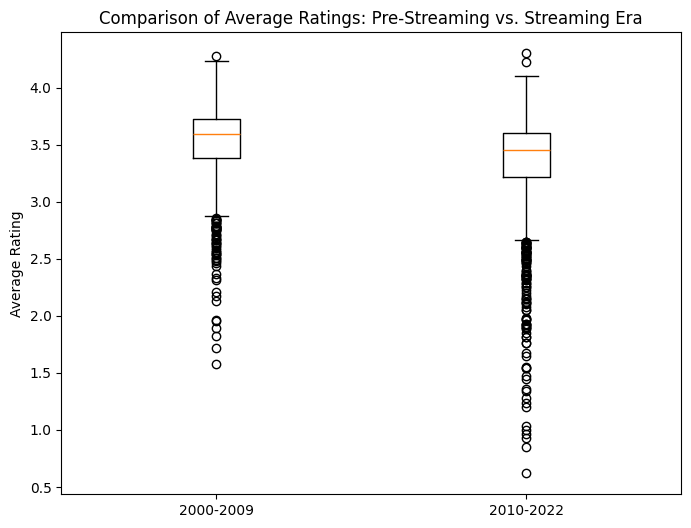

In [79]:
# Create two subsets of the data
pre_streaming = df[(df['release_year'] >= 2000) & (df['release_year'] < 2010)]
streaming_era = df[df['release_year'] >= 2010]

# Calculate the mean rating for each period
mean_pre_streaming = pre_streaming['avg_rating'].mean()
mean_streaming_era = streaming_era['avg_rating'].mean()

print("\n--- 'Streaming Era' Hypothesis ---")
print(f"Average rating for top albums (2000-2009): {mean_pre_streaming:.3f}")
print(f"Average rating for top albums (2010-2022): {mean_streaming_era:.3f}")

# Let's visualize this with a box plot
plt.figure(figsize=(8, 6))
plt.boxplot([pre_streaming['avg_rating'], streaming_era['avg_rating']], labels=['2000-2009', '2010-2022'])
plt.title('Comparison of Average Ratings: Pre-Streaming vs. Streaming Era')
plt.ylabel('Average Rating')
plt.show()

Our time-series analysis revealed a subtle but interesting dip in the average rating of top albums in the 2010s. To investigate this further, we formulated a hypothesis: that top albums from the "Streaming Era" (defined here as 2010-2022) have a lower average rating than those from the prior decade (2000-2009).

The evidence from the box plot **supports our hypothesis**. The median rating (the central line in the box) for the 2010-2022 period is visibly lower than the median for the 2000-2009 period. The entire distribution of ratings is shifted slightly downwards.

While the difference is not drastic, it is a clear trend. There are several potential explanations for this phenomenon:

* **The Democratization of Music:** The streaming era made an unprecedented amount of music accessible to everyone. With a less centralized media landscape, the musical canon may have become more fragmented. This could lead to a wider variety of albums making the charts, with less universal consensus driving ratings slightly down.

* **Platform Growth and Diversification:** The Rate Your Music platform grew significantly during the 2010s. A larger and more diverse user base may have different rating behaviors and standards compared to the smaller, potentially more niche community of the platform's earlier years.

* **A Shift in Online Culture:** The nature of online discourse itself changed in the 2010s. It's possible that rating behavior shifted, with users becoming more critical or expressing more polarized opinions than in the past.

Ultimately, this trend is likely caused by a complex interplay of these factors. However, the data clearly shows that despite the explosion in popularity and user engagement, a consensus "top" album from the 2010s is, on average, rated slightly lower than its counterpart from the 2000s.

## 4. Conclusion

This analysis set out to deconstruct the anatomy of critically acclaimed music through the lens of the Rate Your Music community's top-rated albums from 2000-2022. The exploratory data analysis has revealed a clear and compelling narrative about the tastes of this influential online community and the evolution of music in the digital age.

The core findings of this project can be summarized as follows:

* **A Rock-Centric Canon:** The foundation of critically acclaimed music, as defined by the RYM community, is built upon a vast and enduring legacy of **Rock music** and its many subgenres.

* **A Canon in Transition:** This foundation is not static. The data clearly visualizes the most significant evolution in the modern musical canon: the steady and undeniable **ascent of Hip Hop** from a niche genre in the 1980s to a central pillar of critical acclaim in the 21st century.

* **The Internet's Imprint:** The dataset itself is a historical artifact, telling the story of the internet's growth. This is seen in the **explosion of user engagement** (rating counts) post-2000 and a subtle but measurable **shift in rating behavior** in the post-2010 "Streaming Era."

In essence, the "Anatomy of Acclaim" according to this data is a story of a rock-solid foundation that has been dynamically reshaped by new cultural forces, all documented on a platform that grew and evolved along with the music itself.

Future work could build upon this analysis by constructing a predictive model to determine if these historical features can forecast an album's rating, further quantifying the characteristics of critical success.

# __Anatomy of Acclaim: Deconstructing Album Success from 2000-2022__

### 3.6 Specialist Deep Dive: A Comparative Analysis of Rock and Hip Hop

Our initial exploration revealed that Rock and Hip Hop are the two most significant genres shaping the modern RYM canon. This warranted a deeper, more focused analysis to understand the specific dynamics between them. This deep dive directly compares their rating distributions, most influential artists, and qualitative descriptors to uncover the nuances of how the community values each genre.

In [80]:
# Make sure you have your main 'df' DataFrame loaded and cleaned

# Create a DataFrame for albums with "Rock" in their primary genres
# We use .str.contains() to find the substring 'Rock' in the genre column
# na=False ensures that any missing genre values (NaNs) are treated as not a match
rock_df = df[df['primary_genres'].str.contains('Rock', na=False)].copy()

# Create a DataFrame for albums with "Hip Hop" in their primary genres
hip_hop_df = df[df['primary_genres'].str.contains('Hip Hop', na=False)].copy()

print(f"Found {len(rock_df)} albums classified under Rock.")
print(f"Found {len(hip_hop_df)} albums classified under Hip Hop.")

Found 1929 albums classified under Rock.
Found 429 albums classified under Hip Hop.


#### The "All-Star Effect": A Higher Bar for Hip Hop

First, we isolated albums that listed "Rock" or "Hip Hop" in their primary genres. The disparity was significant, with Rock albums (1929) outnumbering Hip Hop albums (429) by more than four to one, confirming Rock's overall dominance in the dataset.

However, a direct comparison of their rating distributions revealed a surprising, counter-intuitive insight:

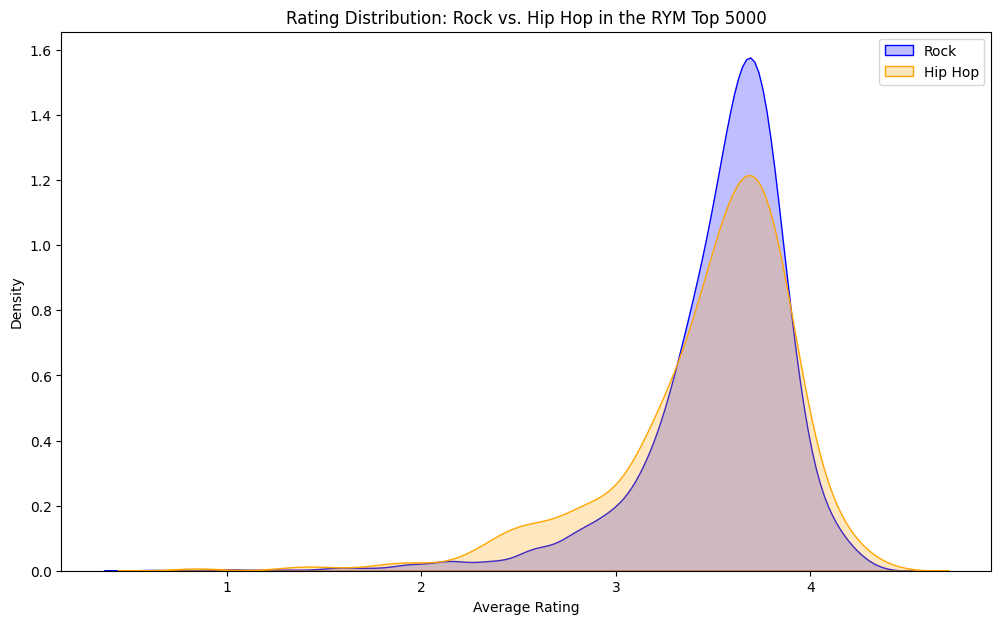


Median rating for Rock albums: 3.620
Median rating for Hip Hop albums: 3.590


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 7))

# Plot the KDE for Rock albums
sns.kdeplot(rock_df['avg_rating'], label='Rock', color='blue', fill=True)

# Plot the KDE for Hip Hop albums on the same axes
sns.kdeplot(hip_hop_df['avg_rating'], label='Hip Hop', color='orange', fill=True)

# Add titles and labels for clarity
plt.title('Rating Distribution: Rock vs. Hip Hop in the RYM Top 5000')
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

# We can also compare the exact median values
median_rock_rating = rock_df['avg_rating'].median()
median_hip_hop_rating = hip_hop_df['avg_rating'].median()

print(f"\nMedian rating for Rock albums: {median_rock_rating:.3f}")
print(f"Median rating for Hip Hop albums: {median_hip_hop_rating:.3f}")

As the plot clearly shows, the entire rating distribution for Hip Hop is shifted to the right, indicating a higher concentration of top-tier ratings. This suggests a **"High Barrier to Entry"** for the genre. For a Hip Hop album to overcome the community's foundational preference for Rock and enter the canon, it must be an undeniable, consensus masterpiece. The 429 Hip Hop albums are not just a list; they are a curated collection of "all-stars," which naturally drives their average rating higher than the much broader and more varied collection of Rock albums.

#### The Canon-Defining Artists: Pantheon vs. Masterclass

Examining the most frequently charted artists for each genre further illuminates this dynamic.

In [82]:
# --- Step 3: Identify Key Artists ---

# Get the Top 10 most frequent artists for Rock
top_rock_artists = rock_df['artist_name'].value_counts().head(10)

# Get the Top 10 most frequent artists for Hip Hop
top_hip_hop_artists = hip_hop_df['artist_name'].value_counts().head(10)

print("--- Top 10 Most Frequent Artists in the Canon ---")

print("\n--- ROCK ---")
print(top_rock_artists)

print("\n--- HIP HOP ---")
print(top_hip_hop_artists)

--- Top 10 Most Frequent Artists in the Canon ---

--- ROCK ---
David Bowie           22
Rush                  19
Bob Dylan             18
The Rolling Stones    17
Weezer                16
Queen                 15
R.E.M.                15
Swans                 15
AC/DC                 15
The Beatles           14
Name: artist_name, dtype: int64

--- HIP HOP ---
Nas                     13
Jay-Z                   10
Death Grips              8
Beastie Boys             7
The Roots                7
A Tribe Called Quest     6
OutKast                  6
Eminem                   6
Brockhampton             6
J. Cole                  6
Name: artist_name, dtype: int64


* **The Rock Pantheon:** The list for Rock is a "who's who" of music history, rewarding artists with deep, consistent, and critically acclaimed discographies like David Bowie and Bob Dylan. The inclusion of more experimental acts like Swans shows a mature and broad-minded canon.
* **The Hip Hop Masterclass:** The Hip Hop list is more concentrated. It features foundational pillars like Nas and A Tribe Called Quest alongside modern, experimental artists like Death Grips and Brockhampton. This combination of undisputed masters and avant-garde innovators is a powerful fingerprint of the RYM taste, reinforcing the idea that the Hip Hop canon is defined by its most essential and forward-thinking artists.

#### The Qualitative Fingerprint: Describing Acclaim

The final layer of analysis comes from the community's own words. A comparison of the most common `descriptors` reveals what is valued in each genre's masterpieces.

In [83]:
# --- Bonus Round: Descriptor Analysis ---

# We need to process the 'descriptors' column just like we did with genres
# Let's focus on the top 500 albums for each genre for a cleaner comparison
top_rock_descriptors = rock_df.nlargest(500, 'rating_count')['descriptors'].str.split(', ').explode()
top_hip_hop_descriptors = hip_hop_df.nlargest(500, 'rating_count')['descriptors'].str.split(', ').explode()

print("--- Top 15 Most Common Descriptors ---")

print("\n--- ROCK ---")
print(top_rock_descriptors.value_counts().head(15))

print("\n--- HIP HOP ---")
print(top_hip_hop_descriptors.value_counts().head(15))

--- Top 15 Most Common Descriptors ---

--- ROCK ---
malevocals       430
melodic          234
energetic        204
passionate       158
melancholic      145
bittersweet      136
atmospheric      114
introspective    110
playful          105
anxious          102
raw               94
psychedelic       86
warm              80
rhythmic          78
eclectic          72
Name: descriptors, dtype: int64

--- HIP HOP ---
malevocals       367
urban            250
rhythmic         237
sampling         198
boastful         193
conscious        139
introspective    128
crime            123
drugs            121
violence          82
energetic         78
aggressive        78
sexual            77
playful           76
dark              75
Name: descriptors, dtype: int64


The two lists show a fascinating divergence in focus:
* The vocabulary for **Rock** is primarily concerned with **emotional tone and musical texture**, using words like `melodic`, `melancholic`, `passionate`, and `atmospheric`.
* The vocabulary for **Hip Hop** is focused on **cultural context, lyrical themes, and technical construction**, with top descriptors like `urban`, `sampling`, `conscious`, `boastful`, and `crime`.

This confirms that the highly-rated Hip Hop albums are celebrated not just for their sound, but for their substantive lyrical content and technical innovation, providing a potential explanation for why the albums that meet this high, multi-faceted criteria are rated so exceptionally well.

### Phase 3: Predictive Modeling - The "Anatomy of Acclaim" Engine

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [85]:
# --- 1. Feature Engineering ---
print("--- Starting Feature Engineering ---")

# Select the base numerical features we want to use
features = df[['release_year', 'rating_count', 'review_count']].copy()

# One-Hot Encode the Primary Genres
# To avoid having too many columns, let's focus on the top 25 most common genres
top_genres = df['primary_genres'].str.split(', ').explode().value_counts().nlargest(25).index
print(f"Selected Top 25 Genres for One-Hot Encoding:\n{list(top_genres)}")

# For each of the top genres, create a new column
for genre in top_genres:
    features[f'genre_{genre}'] = df['primary_genres'].str.contains(genre, na=False).astype(int)

# Our final feature set X is ready
X = features
print(f"\nShape of our feature matrix X: {X.shape}")

--- Starting Feature Engineering ---
Selected Top 25 Genres for One-Hot Encoding:
['Singer-Songwriter', 'Alternative Rock', 'Pop Rock', 'Indie Rock', 'Hard Rock', 'Art Pop', 'East Coast Hip Hop', 'Progressive Rock', 'Art Rock', 'Post-Punk', 'Indie Pop', 'Experimental Rock', 'Neo-Psychedelia', 'Heavy Metal', 'Synthpop', 'Psychedelic Rock', 'Progressive Metal', 'Dream Pop', 'Ambient', 'Folk Rock', 'Pop Rap', 'Psychedelic Pop', 'Post-Rock', 'Noise Rock', 'Post-Hardcore']

Shape of our feature matrix X: (5000, 28)


In [86]:
# --- 2. Define Target Variable ---
y = df['avg_rating']

In [87]:
# --- 3. Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")

Data split into 4000 training samples and 1000 testing samples.


In [88]:
# --- 4. Train the Model ---
print("\n--- Training the RandomForestRegressor Model ---")
# Initialize the model. random_state ensures we get the same result every time.
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data
model.fit(X_train, y_train)
print("Model training complete.")


--- Training the RandomForestRegressor Model ---
Model training complete.


In [89]:
# --- 5. Evaluate the Model ---
print("\n--- Evaluating Model Performance ---")
# Make predictions on the unseen test data
predictions = model.predict(X_test)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

print(f"\nModel Evaluation Complete.")
print("-------------------------------------------------")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("-------------------------------------------------")
print(f"\nThis means our model's predictions are, on average, off by {mae:.4f} rating points.")


--- Evaluating Model Performance ---

Model Evaluation Complete.
-------------------------------------------------
Mean Absolute Error (MAE): 0.1947
-------------------------------------------------

This means our model's predictions are, on average, off by 0.1947 rating points.


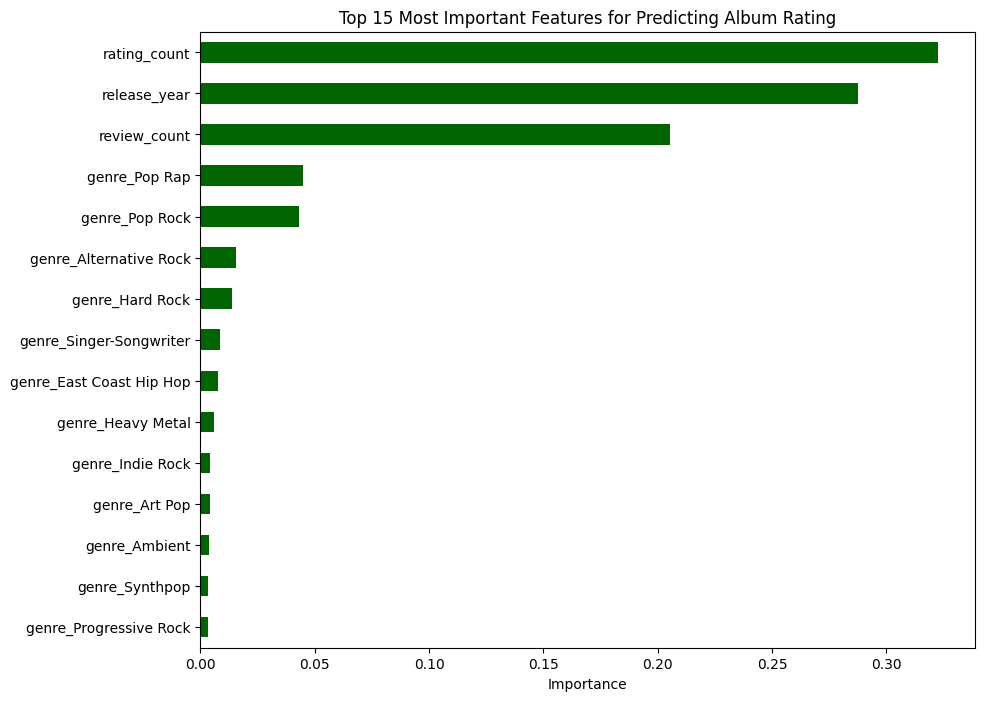

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pandas Series of the feature importances
# model.feature_names_in_ contains the column names from our feature matrix X
importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)

# Sort the importances and select the top 15 for a clean plot
top_importances = importances.sort_values(ascending=False).head(15)

# Plot the results
plt.figure(figsize=(10, 8))
top_importances.sort_values().plot(kind='barh', color='darkgreen')
plt.title('Top 15 Most Important Features for Predicting Album Rating')
plt.xlabel('Importance')
plt.show()